In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
import os
os.getcwd()
plt.style.use('ggplot')

In [3]:
# load data(강수량과 수요량 사이의 상관계수 히트맵)
train = pd.read_csv('../../data/traindata.csv');train

# load data(확진자 급증 시점 수요량과의 상관계수 히트맵)
infected = pd.read_csv('../../data/df_with_infected.csv', index_col = 0)
infected

,date,광진구,동대문구,성동구,중랑구,temp,rain,humid,snow,sum
0,2020-01-20,3.156,2.142,2.852,1.394,2.438462,0.000000,45.461538,0.0,0
1,2020-01-21,3.420,2.288,2.996,1.620,0.330769,0.000000,33.769231,0.0,0
2,2020-01-22,3.780,2.424,3.074,1.626,3.838462,0.000000,31.230769,0.0,0
3,2020-01-23,3.998,2.424,3.172,1.800,5.538462,0.000000,43.307692,0.0,0
4,2020-01-24,2.388,1.392,1.864,1.288,3.653846,0.000000,59.846154,0.0,0
...,...,...,...,...,...,...,...,...,...,...
342,2020-12-27,3.528,2.604,3.258,2.038,6.484615,0.000000,61.384615,0.0,348
343,2020-12-28,4.542,3.588,4.506,2.480,7.846154,0.000000,70.538462,0.0,290
344,2020-12-29,3.694,3.054,3.222,2.118,1.807692,0.015385,76.615385,0.0,447
345,2020-12-30,2.366,1.812,2.012,1.174,-10.538462,0.000000,52.461538,0.0,367


In [4]:
infected.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 346
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    347 non-null    object 
 1   광진구     347 non-null    float64
 2   동대문구    347 non-null    float64
 3   성동구     347 non-null    float64
 4   중랑구     347 non-null    float64
 5   temp    347 non-null    float64
 6   rain    347 non-null    float64
 7   humid   347 non-null    float64
 8   snow    347 non-null    float64
 9   sum     347 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 29.8+ KB


In [5]:
infected.date = pd.to_datetime(infected['date'])

In [6]:
infected.set_index('date', inplace  = True)
rainy = infected.loc['2020-07-01':'2020-08-31', ['광진구', 'rain']]

In [7]:
# 상관계수 히트맵
rainy.corr()

,광진구,rain
광진구,1.000000,-0.669631
rain,-0.669631,1.000000


In [8]:
rainy.pivot_table(index = 'date', columns = 'date', values = )

SyntaxError: invalid syntax (1977838488.py, line 1)

In [9]:
rainy.unstack()

      date      
광진구   2020-07-01    10.132000
      2020-07-02    10.740000
      2020-07-03    10.232000
      2020-07-04    10.608000
      2020-07-05    11.508000
                      ...    
rain  2020-08-27     0.546154
      2020-08-28     0.961538
      2020-08-29     0.653846
      2020-08-30     0.153846
      2020-08-31     0.000000
Length: 124, dtype: float64

In [10]:
index = rainy.index
matrix = np.zeros((len(index), len(index)))

for i in range(len(index)):
    for j in range(len(index)):
        matrix[i,j] = np.corrcoef(rainy.광진구[i], rainy.rain[j])[1,0]
matrix

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [11]:
np.corrcoef(rainy.광진구[0], rainy.rain[0])

array([[nan, nan],
       [nan, nan]])

In [12]:
np.corrcoef(rainy.광진구[:10], rainy.rain[:10])[0,1]

-0.35162091817246155

In [13]:
# 7.1~8.31일까지 10일단위로 잘라서 상관계수를 확인한 후 히트맵 시각화
matrix = np.zeros((6,6))
for i in range(6):
    for j in range(6):
        matrix[i,j] = np.corrcoef(rainy.광진구[i*10:(i+1)*10], rainy.rain[j*10:(j+1)*10])[0,1]

In [14]:
cor_index = index[10::10]

In [15]:
cor_df = pd.DataFrame(matrix, index = cor_index, columns = cor_index)

In [16]:
cor_df.index = cor_df.index.astype('str')
cor_df.columns = cor_df.index

In [67]:
px.imshow(cor_df, text_auto=True, color_continuous_scale='RdBu_r')

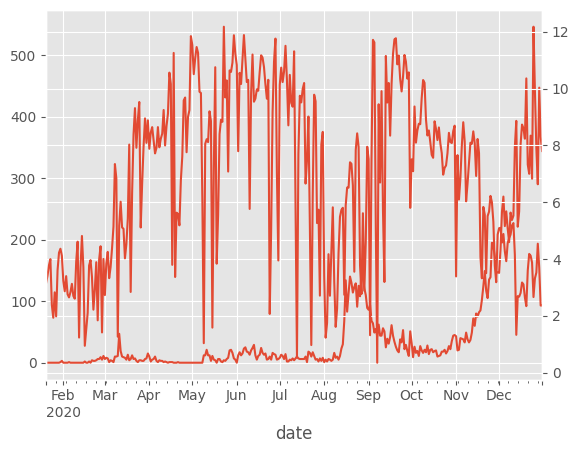

In [90]:
infected['sum'].plot()
plt.gca().twinx()
infected['광진구'].plot()
plt.show()

In [72]:
np.correlate(rainy.광진구[:10], rainy.rain[:10], 'full')

array([1.71464615, 1.81753846, 1.73156923, 1.7952    , 1.94750769,
       1.74341538, 1.47366154, 1.77421538, 1.60769231, 1.58467692,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [69]:
np.corrcoef(rainy.광진구[:10], rainy.rain[:10])

array([[ 1.        , -0.35162092],
       [-0.35162092,  1.        ]])

In [92]:
infected_2 = infected.loc['2020-02-01':'2020-02-28', ['광진구', 'rain']]

In [93]:
infected_2.corr()

,광진구,rain
광진구,1.000000,-0.467586
rain,-0.467586,1.000000


In [94]:
rainy.corr()

,광진구,rain
광진구,1.000000,-0.669631
rain,-0.669631,1.000000


In [111]:
fig_1 = px.imshow(rainy.corr(), text_auto=True, color_continuous_scale='RdBu_r', title = '7,8월 heatmap')
fig_2 = px.imshow(infected_2.corr(), text_auto=True, color_continuous_scale='RdBu_r', title = '2월 heatmap')
fig_1.show()
fig_2.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



<Axes: title={'center': '7,8월 heatmap'}>

/Users/kyeongtae/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/Users/kyeongtae/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



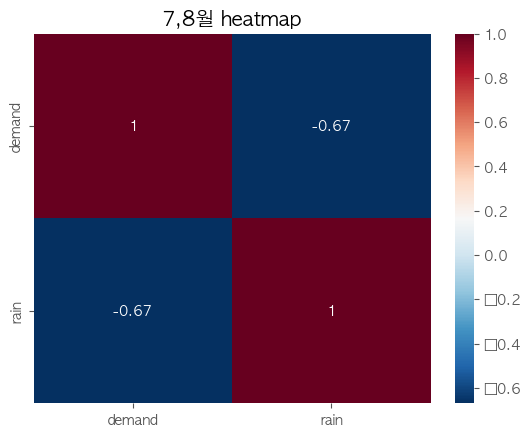

In [106]:
plt.rc('font', family = 'AppleGothic')
plt.title('7,8월 heatmap')
sns.heatmap(rainy.corr(), annot = True, cmap = 'RdBu_r')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



<Axes: title={'center': '2월 heatmap'}>

/Users/kyeongtae/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/Users/kyeongtae/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



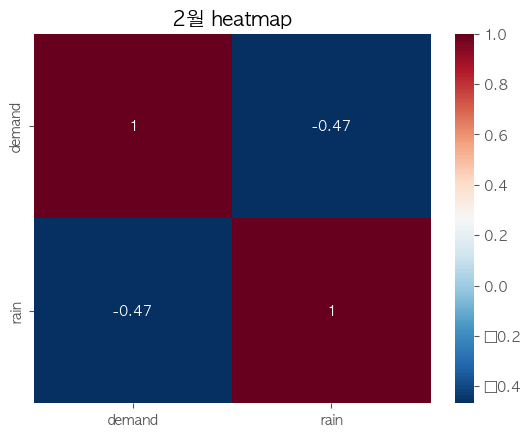

In [110]:
plt.rc('font', family = 'AppleGothic')
plt.title('2월 heatmap')
sns.heatmap(infected_2.corr(), annot = True, cmap = 'RdBu_r')

In [109]:
infected_2.columns = ['demand', 'rain']


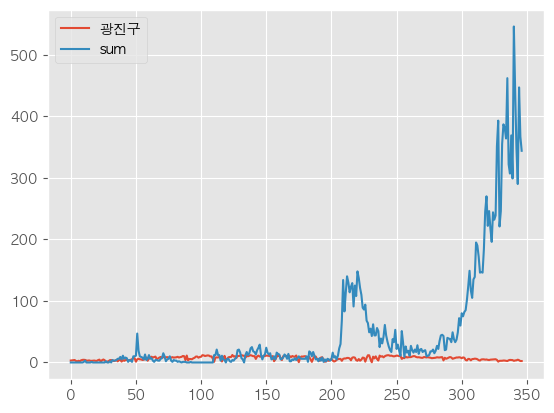

In [33]:
plt.rc('font', family = 'AppleGothic')
infected[['광진구', 'sum']].plot(label = ['demand', 'infected'])
plt.legend()
plt.show()

In [35]:
# 250 이전
inf_250 = infected[:250]
fig_1 = px.imshow(inf_250[['광진구', 'sum']].corr(), text_auto=True, color_continuous_scale='RdBu_r', title = '급증 이전 heatmap')


# 250 이후
inf_350 = infected[250:]
fig_2 = px.imshow(inf_350[['광진구', 'sum']].corr(), text_auto=True, color_continuous_scale='RdBu_r', title = '급증 이후 heatmap')

fig_1.show()
fig_2.show()